# COMP3211 Assigment2 - Image Segmentation using K-Means

## Problem 1: K-means based Unsupservised Segmentation

This code reads an image, converts it from BGR to RGB format, and then flattens each channel of the image into a 2D array. It also prints the shape of the original image and the flattened array, and displays the image using matplotlib.pyplot.

### Importing the libraries and papreprocessing the data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(330, 500, 3)


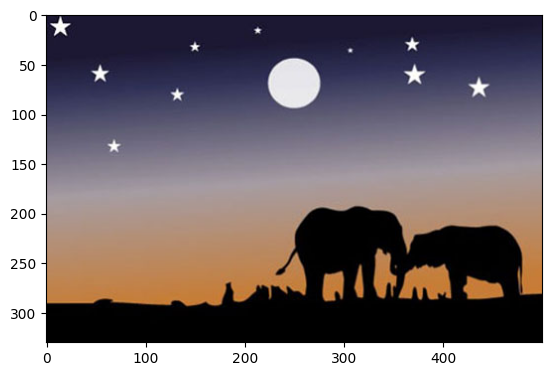

(165000, 3)


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

im =  cv2.imread('/content/drive/MyDrive/COMP3211/Assignment2/elephant.jpg') # Reads an image into BGR Format
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape

print(im.shape)
plt.imshow(im) # as RGB Format
plt.show()

# Flatten Each channel of the Image
all_pixels = im.reshape((-1,3))
print(all_pixels.shape)

### Q1. Implement your K-Means Clustering

This below code implements the K-means clustering algorithm to segment an image based on color attributes. It takes in the number of clusters (n_clusters) and a 2D array of pixel data (all_pixels) as input. The algorithm initializes the centroids randomly and iterates until the centroids converge. During each iteration, it calculates the distance between each pixel and the centroids, assigns each pixel to the nearest centroid, and updates the centroids to be the mean value of the pixels in each cluster. The output of the function are the cluster centroids in RGB format and a label array indicating the cluster to which each pixel belongs. The code also converts the centroids to integer format and prints them.

In [3]:
def k_means_algorithm(n_clusters: int, all_pixels: np.ndarray):
    """
    Applies K-Means clustering on the provided pixel data to segment an image based on color attributes.

    Parameters:
    - n_clusters (int): The number of clusters or segments desired in the output.
    - all_pixels (np.ndarray): A 2D numpy array of shape (h x w, 3). Each row represents a pixel with its RGB values.

    Returns:
    - n_clusters: A numpy array of shape (n_clusters, 3) representing the cluster centroids in RGB format.
    - labels: A numpy array of shape (h x w) where each value is an integer label from 0 to (n_clusters-1), indicating the cluster to which each pixel belongs.
    """
    ######################## Your Implementation #############################
    # Initialize centroids randomly by choosing from data
    centroids = all_pixels[np.random.choice(all_pixels.shape[0], n_clusters, replace=False)]

    while True:
        # Compute the Euclidean distance between all pixels and centroids
        distances = np.linalg.norm(all_pixels[:, np.newaxis, :] - centroids, axis=2)

        # Assign each pixel to the cluster with the nearest centroid
        labels = np.argmin(distances, axis=1)

        # Calculate the new centroids based on the mean value of the pixels in each cluster
        new_centroids = np.array([all_pixels[labels == i].mean(axis=0) if np.sum(labels == i) > 0 else all_pixels[np.random.choice(all_pixels.shape[0])] for i in range(n_clusters)])

        # Check for convergence by comparing new centroids to the previous centroids
        if np.all(np.isclose(centroids, new_centroids, atol=1e-3)):
            break

        centroids = new_centroids

    return centroids, labels

dominant_colors = 4
centers, labels = k_means_algorithm(dominant_colors, all_pixels)

# Convert to Integer format
centers = np.array(centers, dtype='uint8')
print(centers)

[[  1   0   1]
 [ 99  95 118]
 [ 38  35  64]
 [174 145 128]]


### Q2.1 What kind of color are cluster centers presented?

The analysis_colors_and_plot function takes the cluster centroids centers as input. It analyzes the RGB values of the cluster centers and provides a visual representation of the colors by plotting color swatches. It outputs a list called colors where each color is a description of the color represented by the corresponding cluster center.

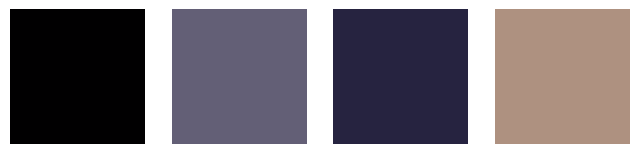

In [4]:
def analysis_colors_and_plot(centers: np.ndarray):
    """
    Analyzes the RGB values of the cluster centers and provides a description of the colors.
    Additionally, it plots the colors for a visual representation.

    Parameters:
    - centers (np.ndarray): A 2D numpy array of shape (n_clusters, 3) representing the cluster centroids in RGB format.

    Returns:
    - colors: A list of color(maybe int tuple) where each is a description of the color represented by the corresponding cluster center.
    """
    colors = []
    plt.figure(0,figsize=(8,2))

    # Storing info in color array
    colors = []
    i = 1

    for each_col in centers:
        plt.subplot(1,centers.shape[0],i)
        plt.axis("off")
        i+=1

        colors.append(each_col)

        # Color Swatch
        a = np.zeros((100,100,3),dtype='uint8')
        a[:,:,:] = each_col
        plt.imshow(a)

    plt.show()
    return colors

colors = analysis_colors_and_plot(centers)

This function is similar to the above function but does not plot the colors

In [5]:
def analysis_colors(centers: np.ndarray):
    """
    Analyzes the RGB values of the cluster centers and provides a description of the colors.
    Additionally, it plots the colors for a visual representation.

    Parameters:
    - centers (np.ndarray): A 2D numpy array of shape (n_clusters, 3) representing the cluster centroids in RGB format.

    Returns:
    - colors: A list of color(maybe int tuple) where each is a description of the color represented by the corresponding cluster center.
    """
    colors = []
    #plt.figure(0,figsize=(8,2))

    # Storing info in color array
    colors = []
    i = 1

    for each_col in centers:
        #plt.subplot(1,centers.shape[0],i)
        #plt.axis("off")
        i+=1

        colors.append(each_col)

        # Color Swatch
        #a = np.zeros((100,100,3),dtype='uint8')
        #a[:,:,:] = each_col
        #plt.imshow(a)

    #plt.show()
    return colors

colors = analysis_colors(centers)
print(colors)

[array([1, 0, 1], dtype=uint8), array([ 99,  95, 118], dtype=uint8), array([38, 35, 64], dtype=uint8), array([174, 145, 128], dtype=uint8)]


### Show the segmented images

## `match_color_to_all_pixels` Workings
The code defines a function `match_color_to_all_pixels` that maps the cluster centroids (colors) to the original image pixels based on the labels. The function takes the following parameters:

- `colors`: A list containing the RGB values of the cluster centroids.
- `labels`: A 1D numpy array where each value represents the cluster label of the corresponding pixel in the original image.
- `new_img`: A numpy array to store the resultant segmented image. It should have the same shape as the original image.
- `original_shape`: A tuple representing the original shape of the image.

The function iterates over each index `ix` in the first dimension of `new_img`. It assigns the RGB values of the corresponding cluster centroid from `colors` to the `ix`-th pixel in `new_img` based on the label in `labels`.

After the loop, the function reshapes `new_img` to the original shape of the image using `original_shape`. The resultant segmented image is then returned.

The code continues by initializing a `new_img` numpy array of shape `(width*height, channels)` filled with zeros. It then calls the `match_color_to_all_pixels` function with the appropriate arguments (`colors`, `labels`, `new_img`, `original_shape`). The resultant segmented image is stored back in `new_img`.

Finally, the segmented image is displayed using `plt.imshow` and `plt.show()`.

(165000, 3)


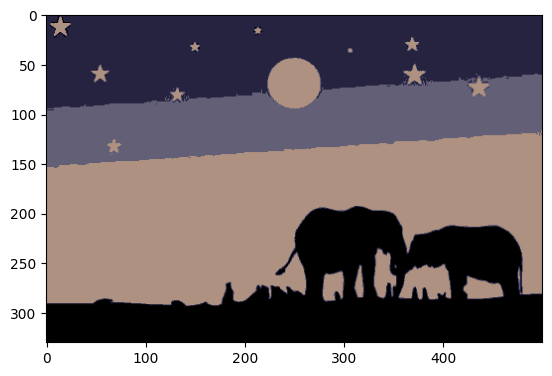

In [6]:
# Iterate over the image
def match_color_to_all_pixels(colors: list, labels: np.ndarray, new_img: np.ndarray, original_shape: tuple) -> np.ndarray:
    """
    Maps the cluster centroids (colors) to the original image pixels based on the labels.

    Parameters:
    - colors (list): A 2D numpy array of shape (n_clusters, 3) representing the cluster centroids in RGB format.
    - labels (np.ndarray): A 1D numpy array of shape (h x w) where each value is an integer label from 0 to (n_clusters-1), indicating the cluster to which each pixel belongs.
    - new_img (np.ndarray): A numpy array to store the resultant segmented image. It should have the same shape as the original image.
    - original_shape (tuple): A tuple representing the original shape of the image, i.e., (h, w, 3).

    Returns:
    - np.ndarray: The resultant segmented image.
    """

    for ix in range(new_img.shape[0]):
        new_img[ix] = colors[labels[ix]]

    new_img = new_img.reshape((original_shape))

    return new_img

width, height, chanles = im.shape
new_img = np.zeros((width*height,chanles),dtype='uint8')
print(new_img.shape)

new_img = match_color_to_all_pixels(colors, labels, new_img, original_shape)

plt.imshow(new_img)
plt.show()



### Q2.2 Please show the segmented images for different values of K = 2, 4, 6, 8, 10, draw in one line

The code segment tests the image segmentation process using different values of K (2, 4, 6, 8, 10).

It starts by defining the `dominant_colors` list, which contains the values of K to test.

Next, it sets up a figure with a size of (10, 10) using `plt.figure`. This figure will be used to display the segmented images.

For each value of K in `dominant_colors`, the code performs the following steps:
1. Applies the K-means algorithm (`k_means_algorithm`) to cluster the pixels of the image (`all_pixels`) into K clusters. It returns the cluster centroids (`centers`) and the cluster labels (`labels`).
2. Converts the cluster centroids (`centers`) to the integer format using `np.array` and `dtype='uint8'`.
3. Calls the `analysis_colors_and_plot` function to analyze the colors represented by the cluster centroids and plot them as color swatches. It returns the list of colors (`colors`).
4. Initializes a `new_img` numpy array of zeros with the shape `(width*height, channels)`, where `width`, `height`, and `channels` are obtained from the shape of the original image (`im.shape`).
5. Calls the `match_color_to_all_pixels` function to map the cluster centroids to the original image pixels based on the labels. It returns the segmented image in `new_img`.
6. Uses `plt.imshow` to display the segmented image.
7. Sets the title of the plot to indicate the value of K being used (`f"K={n_clusters}"`).
8. Turns off the plot axis using `plt.axis('off')`.
9. Displays the plot using `plt.show()`.

This process is repeated for each value of K in `dominant_colors`, resulting in multiple subplots showing the segmented images with different values of K.

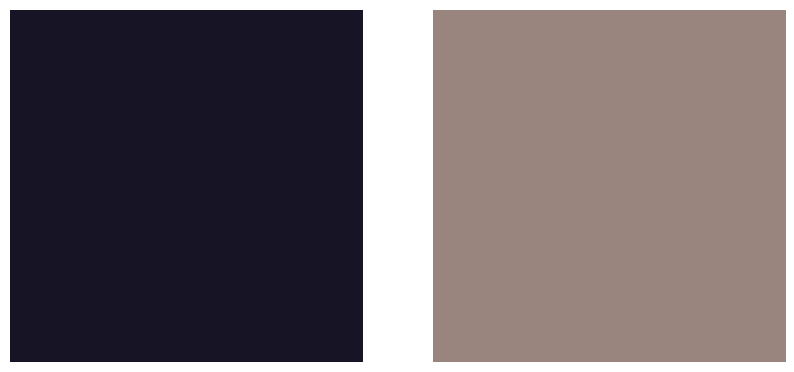

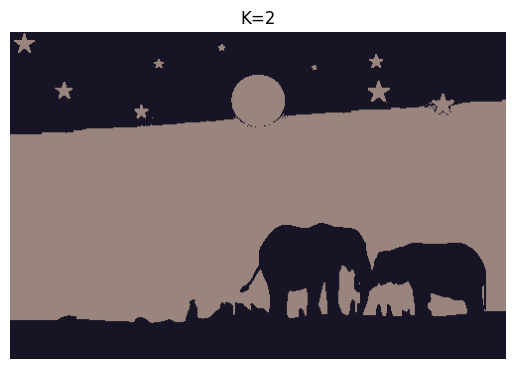

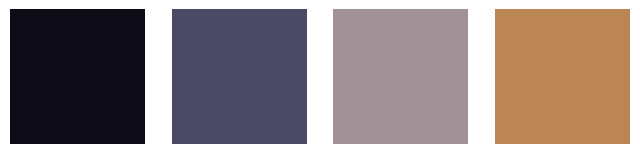

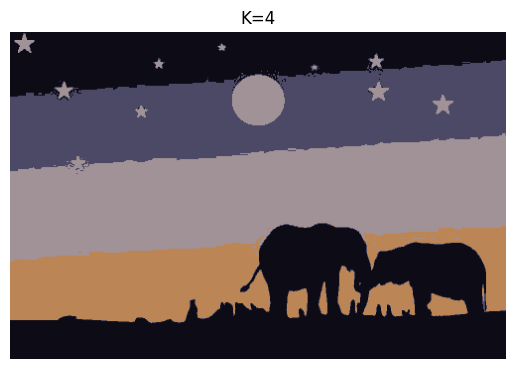

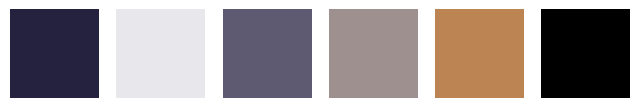

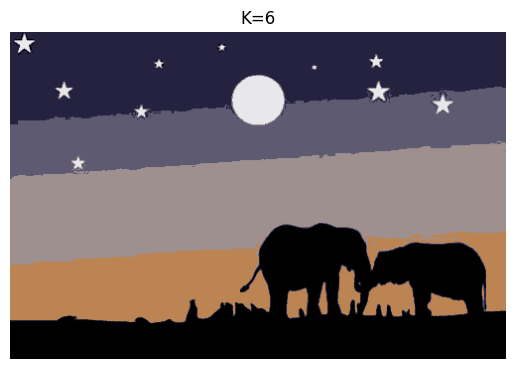

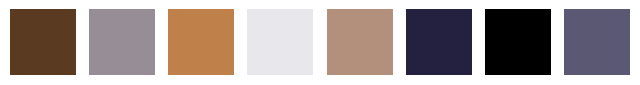

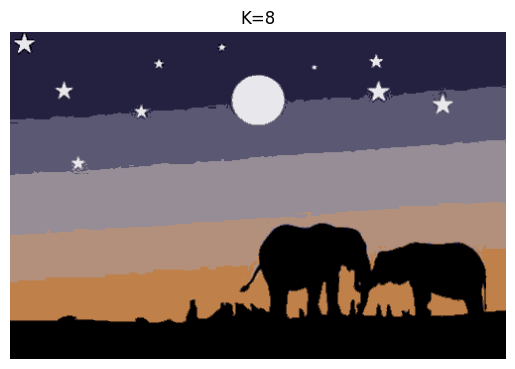

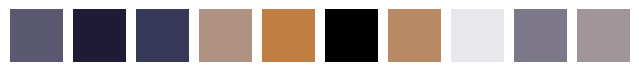

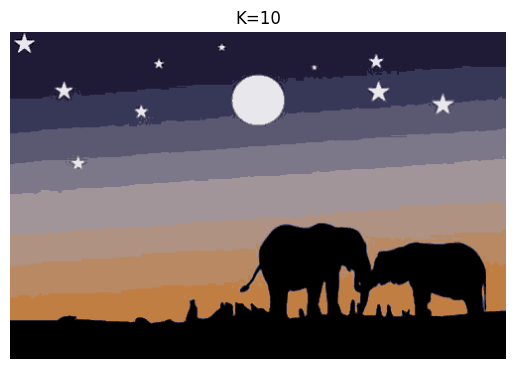

In [7]:
######################## Your Implementation #############################
# Test with cluster values of K=2,4,6,8,10
dominant_colors = [2, 4, 6, 8, 10]

plt.figure(0,figsize=(10,10))

for n_clusters in dominant_colors:
    centers, labels = k_means_algorithm(n_clusters, all_pixels)

    # Convert to Integer format
    centers = np.array(centers, dtype='uint8')
    #print(centers)

    colors = analysis_colors_and_plot(centers)
    #print(colors)

    width, height, channels = im.shape
    new_img = np.zeros((width*height, channels), dtype='uint8')
    #print(new_img.shape)

    new_img = match_color_to_all_pixels(colors, labels, new_img, original_shape)

    #plt.subplot(1, len(dominant_colors), dominant_colors.index(n_clusters)+1)
    plt.imshow(new_img)
    plt.title(f"K={n_clusters}")
    plt.axis('off')
    plt.show()
######################## End of Your Implementation ######################

##OBSERVATION
As we can see from the output, as the number of iterations in K Means Clustering increase, more colors are analyzed for image segmentation, i.e, as k increases, image segmentation improves

### Example for features and segmentation via FCN

The code loads an image, applies image segmentation using the FCN-ResNet50 model, and displays the resulting mask for the "dog" class.

Downloading: "https://download.pytorch.org/models/fcn_resnet50_coco-1167a1af.pth" to /root/.cache/torch/hub/checkpoints/fcn_resnet50_coco-1167a1af.pth
100%|██████████| 135M/135M [00:01<00:00, 120MB/s]
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


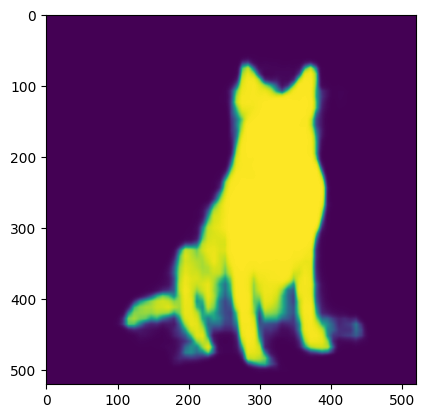

In [8]:
from torchvision.io.image import read_image
from torchvision.models.segmentation import fcn_resnet50, FCN_ResNet50_Weights
from torchvision.transforms.functional import to_pil_image
import matplotlib.pyplot as plt

img = read_image("/content/drive/MyDrive/COMP3211/Assignment2/dog.jpg")

# Step 1: Initialize model with the best available weights
weights = FCN_ResNet50_Weights.DEFAULT
model = fcn_resnet50(weights=weights)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = preprocess(img).unsqueeze(0)

# Step 4: Use the model and visualize the prediction
prediction = model(batch)["out"]

normalized_masks = prediction.softmax(dim=1)
class_to_idx = {cls: idx for (idx, cls) in enumerate(weights.meta["categories"])}
mask = normalized_masks[0, class_to_idx["dog"]]
mask_img = to_pil_image(mask)

plt.imshow(mask_img)

### Q3. Segment image via features from FCN and K-means, set K = 2, 4, 6, 8, 10

In this code, we are using a pre-trained model, specifically the backbone of a feature extraction model, to extract features from an image. We then scale these features using bilinear interpolation and reshape them into a matrix of (2048, -1), which represents the number of pixels in the image and their feature values. Finally, we use this matrix to create a visualization of the dominant colors in the image.

The dominant_colors variable holds a list of the desired number of dominant colors (in this case, [2, 4, 6, 8]), and we define a function called k_means_algorithm that uses the k-means clustering algorithm to find centers and labels for these clusters.

We then create a new image, new_img, that is initially filled with zeros. For each number of desired dominant colors, we run the k-means algorithm on the reshaped feature matrix, and we create a new image by mapping the centers and labels to the colors in the colors list.

Finally, we visualize these images by creating a subplot for each number of dominant colors, displaying the images, and adding a title indicating the number of clusters. We deactivate the axes for a cleaner appearance and show the final figure. This allows us to see how the image changes as we increase the number of dominant colors used to represent it.

(51529, 2048)


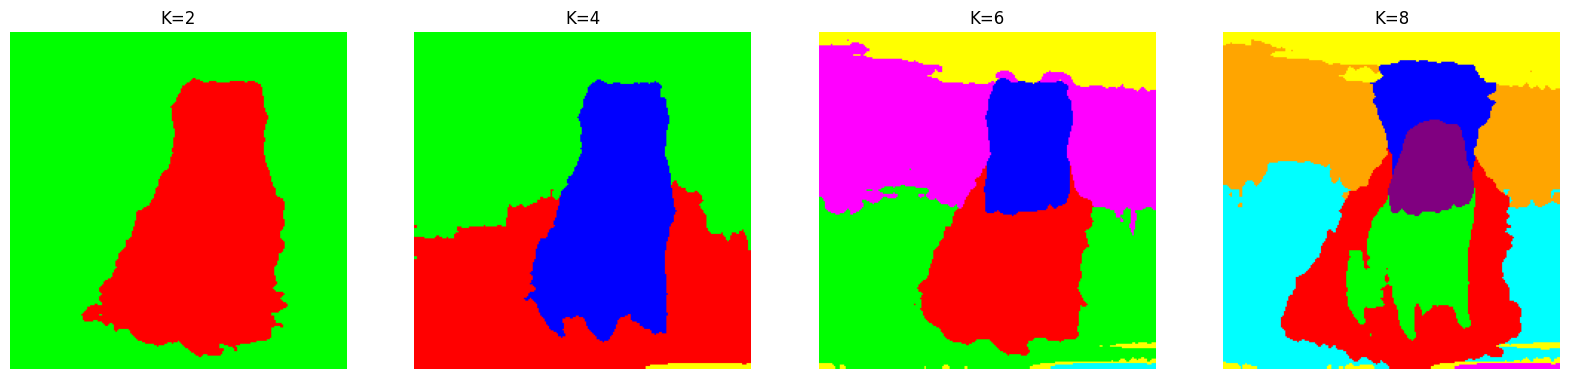

In [9]:
from torch.nn import functional as F
import numpy as np

#Extract features from FCN
orginal_features = model.backbone(batch)["out"]
features = F.interpolate(orginal_features, size=img.shape[-2:], mode="bilinear", align_corners=False)
features = (features.squeeze(0).reshape((2048, -1))).permute(1, 0).detach().numpy() # Now, features is of shape (H*W, C), where C is learned features instead of colors
print(features.shape)

######################## Your Implementation #############################

dominant_colors = [2, 4, 6, 8]
plt.figure(0,figsize=(20,10))
img = read_image("/content/drive/MyDrive/COMP3211/Assignment2/dog.jpg")

channels, height, width = img.shape
original_shape = (height, width, channels)

colors = [(255, 0, 0),
          (0, 255, 0),
          (0, 0, 255),
          (255, 255, 0),
          (255, 0, 255),
          (0, 255, 255),
          (128, 0, 128),
          (255, 165, 0)]

new_img = np.zeros((width*height,channels), dtype='uint8')

for n_clusters in dominant_colors:
    centers, labels = k_means_algorithm(n_clusters, features)

    # Convert to Integer format
    centers = np.array(centers, dtype='uint8')

    new_img = np.zeros((width*height, channels), dtype='uint8')
    new_img = match_color_to_all_pixels(colors, labels, new_img, original_shape)

    plt.subplot(1, len(dominant_colors), dominant_colors.index(n_clusters)+1)
    plt.imshow(new_img)
    plt.title(f"K={n_clusters}")
    plt.axis('off')

plt.show()

######################## End of Your Implementation ######################

##Observation
As we can see from the output, as the number of clusters (As K increases), image segmentation improves. Initially, we can just distinguish the dog from from its surroundings, but as K increases, we start to segment other colours present in the surroundings and even the different colors of the dog

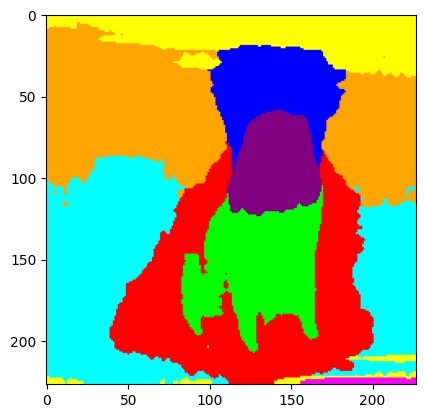

In [10]:
chanles, height, width  = img.shape
original_shape = (height, width, chanles)

new_img = np.zeros((width*height,chanles), dtype='uint8')

colors = [(255, 0, 0),
          (0, 255, 0),
          (0, 0, 255),
          (255, 255, 0),
          (255, 0, 255),
          (0, 255, 255),
          (128, 0, 128),
          (255, 165, 0),
          (0, 0, 0),
          (255, 255, 255)]

new_img = match_color_to_all_pixels(colors, labels, new_img, original_shape)
new_img = new_img.reshape((height, width, chanles))

plt.imshow(new_img)
plt.show()